In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import jinja2

In [9]:
#understand templates from jinja2

tmpl1 = 'My name is {} and age {}'
tmpl = jinja2.Template("My name is {{name}} and age is {{age}}")

In [7]:
name = "adam"
age = 23
tmpl1.format(name,age)

'My name is adam and age 23'

In [11]:
age_young = 4
tmpl.render(name = name, age = age_young)

'My name is adam and age is 4'

In [13]:
tmpl.render(name = "Weronika", age = "241,4")

'My name is Weronika and age is 241,4'

In [14]:
tmpl = jinja2.Template("My dog is {{dt.name}}, and it's age is {{dt.age}}")

tmpl 

<Template memory:7f72cce9a690>

In [15]:
sl = {"name" : "Diego", "age":5 }

In [16]:
tmpl.render(dt=sl)

"My dog is Diego, and it's age is 5"

# HTML

In [17]:
%%HTML
<!DOCTYPE html>
    <html>
        <head>
            <title>Page Title</title>
        </head>
        <body>

            <h1>This is a Heading</h1>
            <p>This is a paragraph.</p>

        </body>
</html> 

In [77]:
tmpl = jinja2.Template("""<!DOCTYPE html>
    <html>
        <head>
            <title>Page Title</title>
        </head>
        <body>

            <h1>This is a Heading</h1>
            
            <p>{{dt.name}}</p>
            <p>{{dt.age}}</p>
                <ul>
                {% for it in dataList %}
                    <li>{{it.tbl}}</li>
                    <img src={{it.im}} alt="image">
                    {%endfor%}
                </ul>

        </body>
</html>  """)
tmpl

<Template memory:7f72cc1c98d0>

In [24]:
from IPython.core.display import display, HTML

In [39]:
display(HTML(tmpl.render(dt=sl)))

In [50]:
ll = range(9)
display(HTML(tmpl.render(dt=sl, myList=ll)))

In [70]:
%ls
%cd /home/adam/projects/github/engineer/data

%mkdir /home/adam/projects/github/engineer/img
%ls
%pwd

countryPopulation.csv  WHO-COVID-19-global-data.csv
tmp.py                 WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx
/home/adam/projects/github/engineer/data
countryPopulation.csv  WHO-COVID-19-global-data.csv
tmp.py                 WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx


'/home/adam/projects/github/engineer/data'

In [56]:
df = pd.read_csv('/home/adam/projects/github/engineer/data/countryPopulation.csv',sep=';')

In [57]:
df.head()

,Country,geo,region,island,c2020
0,Burundi,africa,east,no,11890781
1,Comoros,africa,east,no,869595
2,Djibouti,africa,east,no,988002
3,Eritrea,africa,east,no,3546427
4,Ethiopia,africa,east,no,114963583


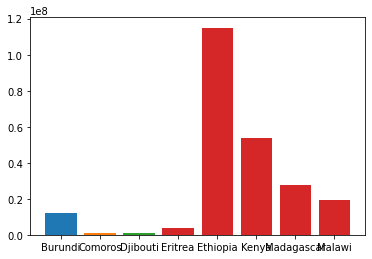

In [74]:
step = 5

ll = []
add = '../img/im0{}.png'
sl = {}

for i in range(4):
    tmp = df.iloc[i:i+step,:]
    plt.bar(tmp.Country,tmp.c2020)
    plt.savefig(add.format(i+1))
    tmp.to_html()
        
    sl['tbl'] = tmp
    sl['im'] = add.format(i+1)
    ll.append(sl)


In [66]:
display(HTML(tmpl.render(dt=sl,myList=ll)))

,Country,geo,region,island,c2020
0,Burundi,africa,east,no,11890781
1,Comoros,africa,east,no,869595
2,Djibouti,africa,east,no,988002
3,Eritrea,africa,east,no,3546427
4,Ethiopia,africa,east,no,114963583
,Country,geo,region,island,c2020
1,Comoros,africa,east,no,869595
2,Djibouti,africa,east,no,988002
3,Eritrea,africa,east,no,3546427
4,Ethiopia,africa,east,no,114963583


In [78]:
display(HTML(tmpl.render(dt=sl,dataList=ll)))